## Human Detection using HOG Feature and SVM Classifier

- Algorithm Detail : https://learnopencv.com/histogram-of-oriented-gradients/
- Lecture : http://www.cs.utoronto.ca/~fidler/slides/CSC420/lecture17.pdf

In [1]:
from skimage.feature import hog
#from skimage.io import imread
import joblib,glob,os,cv2

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files.upload()

{}

In [ ]:
! unzip "/content/drive/MyDrive/Data Image for person detection/DATAIMAGE.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DATAIMAGE/negative/312_0.jpg  
  inflating: DATAIMAGE/negative/312_2.jpg  
  inflating: DATAIMAGE/negative/312_5.jpg  
  inflating: DATAIMAGE/negative/312_6.jpg  
  inflating: DATAIMAGE/negative/313_2.jpg  
  inflating: DATAIMAGE/negative/313_5.jpg  
  inflating: DATAIMAGE/negative/314_0.jpg  
  inflating: DATAIMAGE/negative/314_1.jpg  
  inflating: DATAIMAGE/negative/314_4.jpg  
  inflating: DATAIMAGE/negative/315_1.jpg  
  inflating: DATAIMAGE/negative/315_2.jpg  
  inflating: DATAIMAGE/negative/315_5.jpg  
  inflating: DATAIMAGE/negative/315_6.jpg  
  inflating: DATAIMAGE/negative/316_1.jpg  
  inflating: DATAIMAGE/negative/317_1.jpg  
  inflating: DATAIMAGE/negative/318_5.jpg  
  inflating: DATAIMAGE/negative/319_0.jpg  
  inflating: DATAIMAGE/negative/319_12.jpg  
  inflating: DATAIMAGE/negative/319_4.jpg  
  inflating: DATAIMAGE/negative/319_6.jpg  
  inflating: DATAIMAGE/negative/319_9.jpg  
  inflating: DATAIMAGE/n

### HOG Features

In [ ]:
def feature_extract(img):
  fd = cv2.resize(img,(64,128))
  fd,hog_image = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=True,cells_per_block=(3,3))
  return hog_image

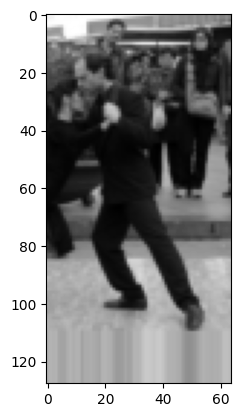

In [ ]:
test_image = "/content/DATAIMAGE/positive/crop001002c.png"
img = cv2.imread(test_image,0)
plt.imshow(img,cmap='gray')

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.2732563 , ...,  1.47465348,
         0.        ,  0.        ],
       [ 0.        ,  2.49424646,  0.        , ...,  0.        ,
        13.91861963,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

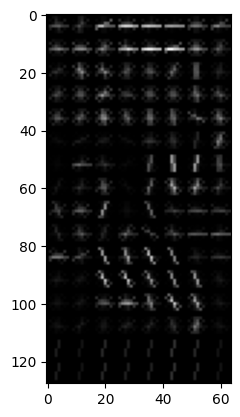

In [ ]:
result = feature_extract(img)
plt.imshow(result,cmap='gray')
result

### Data Preparation

In [ ]:
X = []
Y = []

pos_im_path = '/content/DATAIMAGE/positive'
neg_im_path = '/content/DATAIMAGE/negative'

In [ ]:
# Load the positive features
for filename in glob.glob(os.path.join(pos_im_path,"*.png")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(64,128))
    fd = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
    print(fd)
    X.append(fd)
    Y.append(1)

[0.20290117 0.00481375 0.042859   ... 0.00305529 0.         0.        ]
[0.02914198 0.         0.00562013 ... 0.0341867  0.         0.00918024]
[0.01809945 0.03251993 0.         ... 0.09161104 0.07384145 0.05496903]
[0.02249334 0.         0.00899734 ... 0.01931128 0.03801401 0.03115689]
[0.05561657 0.00829112 0.02229306 ... 0.         0.         0.        ]
[0.07390271 0.03822193 0.02889095 ... 0.02636005 0.03926756 0.04154389]
[0.25034559 0.01783142 0.04795938 ... 0.09551859 0.01902043 0.01029644]
[0.11963415 0.1329     0.01939848 ... 0.13738702 0.10815254 0.05554607]
[0.25275164 0.0355924  0.00457485 ... 0.03890043 0.02478305 0.04702253]
[0.25545369 0.06084605 0.05007618 ... 0.07373567 0.06679757 0.05315624]
[0.0389109  0.04662849 0.00934359 ... 0.04803241 0.03948493 0.03553888]
[0.23714061 0.17436734 0.14974126 ... 0.13899953 0.14453735 0.10025539]
[0.14360725 0.         0.         ... 0.0508832  0.01149334 0.01625404]
[0.22246172 0.0087428  0.00391269 ... 0.0345785  0.01190264 0.  

In [ ]:
# Load the negative features
for filename in glob.glob(os.path.join(neg_im_path,"*.jpg")):
    fd = cv2.imread(filename,0)
    fd = cv2.resize(fd,(64,128))
    fd = hog(fd,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
    X.append(fd)
    Y.append(0)

In [ ]:
X = np.float32(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
print('Train Data:',len(X_train))
print('Train Labels (1,0)',len(y_train))

print('Test Data:',len(X_test))
print('Test Labels (1,0)',len(y_test))

Train Data: 4520
Train Labels (1,0) 4520
Test Data: 1130
Test Labels (1,0) 1130


### Model Training

In [ ]:
model = LinearSVC()
model.fit(X_train,y_train)

LinearSVC()

In [ ]:
# predict
y_pred = model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier LinearSVC():
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       653
           1       0.90      0.92      0.91       477

    accuracy                           0.92      1130
   macro avg       0.92      0.92      0.92      1130
weighted avg       0.92      0.92      0.92      1130




### Demo

In [ ]:
joblib.dump(model, 'models.dat')
print('Model saved : {}'.format('models.dat'))

Model saved : models.dat


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


sc:  [0.5399267033258384, 0.9051090936974022, 0.8124548287998081, 0.8326434183195319, 0.6098412502041999, 0.7956653574300829, 1.843363752537892, 2.0082249009516766]


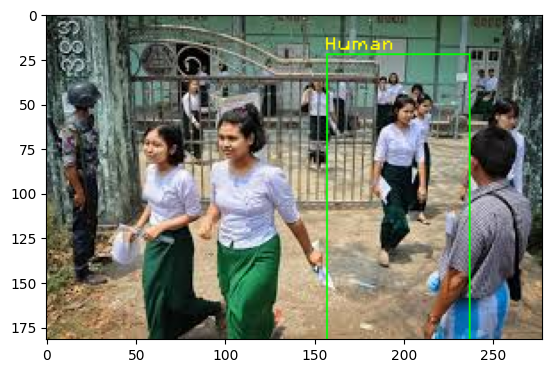

In [ ]:
import numpy as np
import cv2,joblib
from imutils.object_detection import non_max_suppression
import imutils
from skimage.feature import hog
from skimage import color
from skimage.transform import pyramid_gaussian

filename = "/content/test_person.jpg"

image = cv2.imread(filename)
#image = cv2.resize(image,(500,500))
size = (64,128)
step_size = (9,9)
downscale = 1.25
#List to store the detections
detections = []
#The current scale of the image
scale = 0
model = joblib.load('models.dat')

def sliding_window(image, window_size, step_size):
    for y in range(0, image.shape[0], step_size[1]):
        for x in range(0, image.shape[1], step_size[0]):
            yield (x, y, image[y: y + window_size[1], x: x + window_size[0]])

for im_scaled in pyramid_gaussian(image, downscale = downscale):
    #The list contains detections at the current scale
    if im_scaled.shape[0] < size[1] or im_scaled.shape[1] < size[0]:
        break
    for (x, y, window) in sliding_window(im_scaled, size, step_size):
        if window.shape[0] != size[1] or window.shape[1] != size[0]:
            continue
        window = color.rgb2gray(window)

        fd=hog(window, orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
        fd = fd.reshape(1, -1)
        pred = model.predict(fd)
        if pred == 1:

            if model.decision_function(fd) > 0.5:
                detections.append((int(x * (downscale**scale)), int(y * (downscale**scale)), model.decision_function(fd),
                int(size[0] * (downscale**scale)),
                int(size[1] * (downscale**scale))))

    scale += 1
clone = image.copy()
clone = cv2.cvtColor(clone,cv2.COLOR_BGR2RGB)
rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in detections])
sc = [score[0] for (x, y, score, w, h) in detections]
print ("sc: ", sc)
sc = np.array(sc)
pick = non_max_suppression(rects, probs = sc, overlapThresh = 0.5)
for(x1, y1, x2, y2) in pick:
    cv2.rectangle(clone, (x1, y1), (x2, y2), (0, 255, 0))
    cv2.putText(clone,'Human',(x1-2,y1-2),1,0.75,(255,255,0),1)

plt.imshow(clone)